<b>Tasks:</b>
- 1. Loading fetch_california_housing and calculating metrics.
- 2. Checking and deleting correlations. Calculate metrics again.
- 3. Checking and deleting emissions. Calculate metrics again.
- 4. Math transforming of features. Calculate metrics again.
- 5. Concluding.

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as

In [2]:
# Step 1. Load Data
df = pd.DataFrame(fetch_california_housing(as_frame=True).frame)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people)

Number of Attributes: 8 numeric, predictive attributes and the target

Attribute Information:
- MedInc -         median income in block
- HouseAge -       median house age in block
- AveRooms -       average number of rooms
- AveBedrms -      average number of bedrooms
- Population -     block population
- AveOccup -       average house occupancy
- Latitude -       house block latitude
- Longitude -      house block longitude

The target variable is the median house value for California districts.

In [4]:
# Step 2. Check Nulls
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [5]:
# Steps 3, 4. Spliting dataset and Computing scores
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


#здесь не совсем корректно, что данные будут делиться на трейн и тест только после преобразовния, 
#по идее тест должен быть "сырым" (но для 
def get_metric_res(X, y, model=None):
    if model is None:
        model = LinearRegression()
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    pred = model.fit(X_train, y_train).predict(X_test)
    print(f'RMSE : {mean_squared_error(y_test, pred)}')
    print(f'r2 : {r2_score(y_test, pred)}')

    
get_metric_res(df.drop(columns=['MedHouseVal']), df['MedHouseVal'])

RMSE : 0.5305677824766752
r2 : 0.5957702326061665


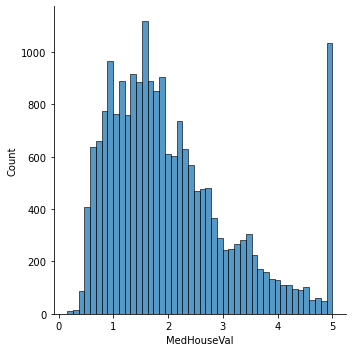

In [6]:
# Step 5. Getting a distibution graph
g = sns.displot(data=df, x=df['MedHouseVal'])

Набор данных можно было бы считать нормально распределенным с небольшим смещением к левому краю.

Исключение состовляет большое колиество домов с самой высокой стоиомстью (~5). 

Могу проедположить, что самое популярное и среднее по своим параметрам жилье в дата сете стоит порядка 2. Часть построек которая дешевле и веротянее хуже по свому качеству; также есть постройки лучше (скажем новое жилье и с лучшей инфраструктурой). 

И могу предположить что выброс состовялет какой-то мега крутой район для богатых, где жилье резко дорожает, и предположим это какой то очень популярный район среди американцев.

Считаю, что такое большое количество домов с высокой стоимостью не совсем является выбросом (т.е. исключением по своей сути), а скорее особенностью данных районов). Удалять их из дата сета думаю нецелесообразным.

<AxesSubplot:>

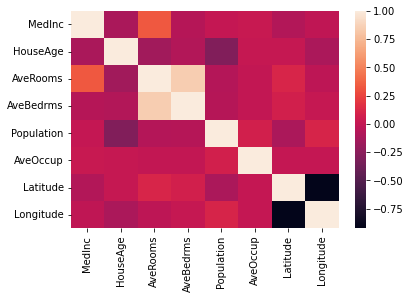

In [7]:
# Step 6. Checking correlation 
sns.heatmap(df.drop(columns=['MedHouseVal']).corr())

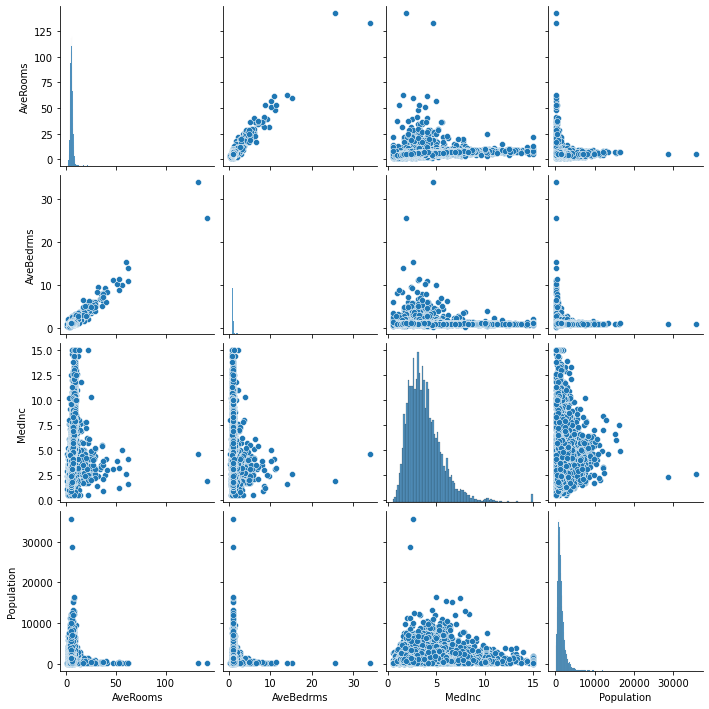

In [8]:
# 1. 'AveRooms', 'AveBedrms' - very high (for delete)
# 2. 'AveRooms', 'MedInc' - high
# 3. just for visualization 
sns.pairplot(data=df[['AveRooms', 'AveBedrms', 'MedInc', 'Population']])

Удалим [AveRooms], т.к. это поле имеет высокую с [AveBedrms] корреляцию, а также имеет не самый низкую корреляцию с полем [MedInc].

Остальные признаки имеют примерно равную степень корреляции между собой.

<AxesSubplot:>

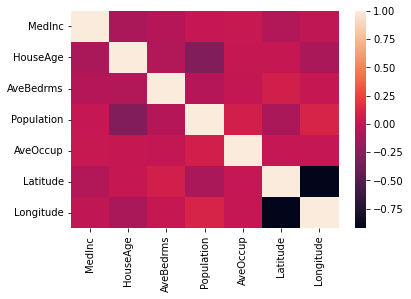

In [9]:
df = df.drop(columns=['AveRooms'])
sns.heatmap(df.drop(columns=['MedHouseVal']).corr())

In [11]:
get_metric_res(df.drop(columns=['MedHouseVal']), df['MedHouseVal'])

RMSE : 0.5305540749343546
r2 : 0.5957806761287978


Удалил [AveRooms], т.к. этот признак имеет высокую корреляцию с [AveBedrms], а также имеет не самый низкую корреляцию с полем [MedInc].

Остальные признаки имеют примерно равную степень корреляции между собой.

- Показатели качества существенно не изменились после данного преобразования.

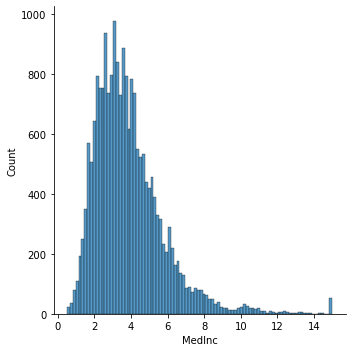

In [12]:
# Step 7. Checking emissions

# emissions for MedInc -> MedInc <= ~9
sns.displot(data=df, x=df['MedInc'])

<AxesSubplot:xlabel='HouseAge'>

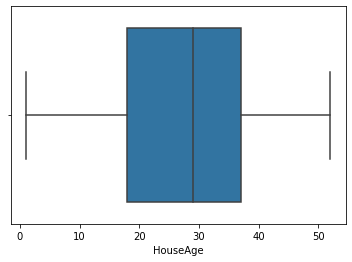

In [13]:
# emissions for HouseAge -> OK
sns.boxplot(x=df['HouseAge'])

<AxesSubplot:xlabel='AveBedrms'>

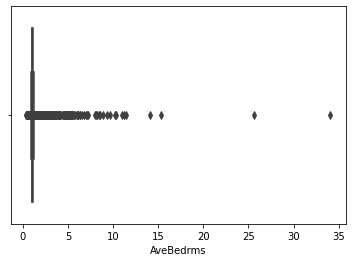

In [14]:
# emissions for AveBedrms -> AveBedrms <= ~1.21 AND AveBedrms >= ~0.88
sns.boxplot(x=df['AveBedrms'])

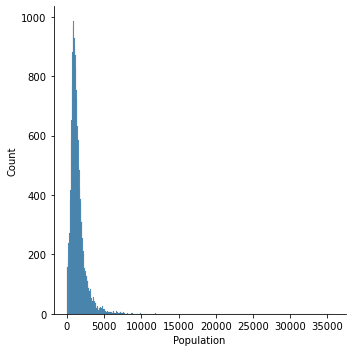

In [15]:
# emissions for Population -> Population <= ~4000
sns.displot(data=df, x=df['Population'])

<AxesSubplot:xlabel='AveBedrms'>

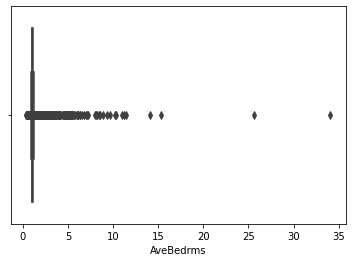

In [16]:
# emissions for AveOccup-> AveOccup <= ~4.3  AND AveOccup >= 1.3
sns.boxplot(x=df['AveBedrms'])

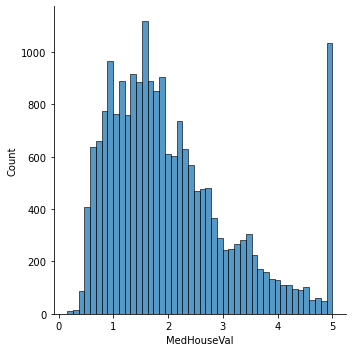

In [17]:
# emissions for MedHouseVal -> MedHouseVal <= ~4.8
sns.displot(data=df, x=df['MedHouseVal'])

In [18]:
# Cleaning data from emissions
df = df[df['MedInc'] <= 9] #7.5  9
df = df[(df['AveBedrms'] <= 1.21) & (df['AveBedrms'] >= 0.88)]
df = df[df['Population'] <= 4000] # 2700  4000
df = df[(df['AveOccup'] <= 4.3) & (df['AveOccup'] >= 1.3)]
df = df[df['MedHouseVal'] <= 4.8]
len(df)

16375

In [20]:
get_metric_res(df.drop(columns=['MedHouseVal']), df['MedHouseVal'])

RMSE : 0.3269423230116635
r2 : 0.6311770842406299


Удалилось примерно 4500 тысяч строк, что около 25% данных. (<b>можно ли удалять столько данных?!</b>)
- Ошибку mse удалось уменьшить до 32%.
- Метрика r2 улучшилась до 63 процентов.

In [21]:
# Step 8. Math transforming some features

In [22]:
# Логарифм от HouseAge чтобы признак был больше похож на нормально распределенный
df['HouseAge'] = np.log(df.HouseAge)

In [23]:
get_metric_res(df.drop(columns=['MedHouseVal']), df['MedHouseVal'])

RMSE : 0.3281798611704825
r2 : 0.6297810201645733


In [41]:
# Биннинг
df['MedInc'] = pd.qcut(df['MedInc'], q=8, labels=False)
df['HouseAge'] = pd.qcut(df['HouseAge'], q=10, labels=False)

In [43]:
get_metric_res(df.drop(columns=['MedHouseVal']), df['MedHouseVal'])

RMSE : 0.36580324235304823
r2 : 0.5873381665729778


In [24]:
# Полинамизация, возможно перемножение некоторых средних величин смогут дать новые полезные признаки.
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

x = polynomial_features.fit_transform(df.drop(columns=['MedHouseVal']))

In [25]:
get_metric_res(x, df['MedHouseVal'])

RMSE : 0.29142345060649544
r2 : 0.6712458461075106


<b>Выводы:</b>

На шаге 8 были выполнены логарифмирование, биннинг, полинамизация.
- Малозначительно ухудшило результат логарифмирование признака [HouseAge]
- Сильно ухудшил результат Биннинг признаков [MedInc], [HouseAge]
- <b>Улучшила метрики качества Полинамазиция признаков с параметром interaction_only=False</b>

|                             |      RMSE   |       R2     |
|-----------------------------|-------------|--------------|
|входные без преобразований   |     53%     |      60%     |
|избавление от корреляций     |     53%     |      60%     |
|избавление от выбросов       |     33%     |      63%     |
|логарифмирование [HouseAge]  |     33%     |      63%     |
|Биннинг [MedInc] и [HouseAge]|     36%     |      59%     |
|PolynomialFeatures           |     29%     |      67%     |


<b> На этапе избавления от выбросов было удалено примерно 4500 тысяч строк, что около 25% данных. (можно ли удалять столько данных?!) </b>